# Capstone – MSBA – Fall 2024

## Group 7- Modeling Assignment

 <h2>
<ol>
1. <a href="#1.-Introduction">Introduction</a>
    <ul>   
        <li><a href="#i.-Business-Problem">Business Problem</a></li>
        <li><a href="#ii.-Analytics-Approach">Analytics Approach</a></li>
        <li><a href="#iii.-Scope-of-the-Project">Scope</a></li>
        <li><a href="#iv.-Purpose-of-the-Notebook">Purpose of the Notebook</a></li>
    </ul>
    2. <a href="#2.-Data-Exploration">Data-Exploration</a> <ul></ul> 
3. <a href="#3.-Feature-Engineering">Feature Engineering</a><ul></ul>
    4. <a href="#4.Modeling">Modeling</a>
    <ul> 
    <li><a href="#4i.Time-Series-Analysis">Time Series Analysis</a></li>
    <li><a href="#4ii.-Survival-Analysis">Survival Analysis</a></li>
    </ul>   
        5. <a href="#5.Conclusion">Conclusion</a><ul></ul>
    6. <a href="#6.Team-Contribution">Team Contribution</a><ul></ul>

</ol> </br></h2>


## 1. Introduction

This project aims to develop a predictive maintenance model for Swire Coca-Cola to reduce unplanned machine downtimes and improve production efficiency. By analyzing historical downtime data from the IWC system, the model will predict when machines are likely to fail, enabling proactive maintenance scheduling and reducing costly disruptions. The goal is to help Swire Coca-Cola optimize its production capacity, minimize financial losses due to downtime, and better manage spare parts inventory, ultimately improving overall operational performance across its six production plants.

### i. Business Problem

Industrial equipment downtime presents significant challenges that impact efficiency, costs, and resource management. Unexpected failures disrupt operations, leading to delays, underutilization of resources, and cascading inefficiencies across interconnected processes. These unplanned breakdowns also escalate operational expenses through emergency repairs, mismanagement of spare parts, and halted production cycles. Moreover, reactive maintenance substantially strains resources, diverting time and effort from strategic, long-term objectives. Addressing these challenges is critical to ensuring operational continuity, cost-effectiveness, and sustainable growth.

### ii. Analytics Approach

This project adopted a comprehensive data-driven approach to address equipment maintenance challenges. Our analytical approach aimed to extract actionable insights and establish a robust framework for predictive maintenance. We began with exploratory data analysis to uncover patterns in equipment failures and maintenance schedules. Next, we focused on feature engineering, introducing key metrics like the FAILURE_RISK_SCORE and maintenance frequency, which helped pinpoint high-failure-risk components. Using these features and historical data, we applied machine learning to predict future maintenance needs, flagging high-risk equipment and forecasting maintenance dates.

### iii. Scope of the Project

This project aims to develop a predictive maintenance model for Swire Coca-Cola by analyzing machine downtime data to reduce unplanned breakdowns and optimize maintenance schedules. By identifying patterns in historical downtime records and forecasting future breakdowns, the model will help improve production efficiency, reduce costs, and provide actionable insights for maintenance planning. It will also guide spare parts stocking and optimize production guardrails. A user-friendly dashboard will be delivered to help plant supervisors proactively manage maintenance, minimizing downtime and enhancing overall productivity.



### iv. Purpose of the Notebook

The notebook's purpose is to:

• Analyze historical downtime data to identify patterns and factors contributing to machine breakdowns.

• Develop predictive models (time series, decision trees, and survival analysis) to forecast machine failures.

• Evaluate and compare model performance using metrics such as MAE, RMSE, R², and concordance index (C-index).

• Provide actionable insights, including maintenance schedules and spare part inventory recommendations.


## 2. Data Exploration

In [18]:
# Loading Libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose, STL

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

from sklearn.model_selection import KFold
from lifelines import WeibullAFTFitter
from lifelines import KaplanMeierFitter, CoxPHFitter




In [5]:
# Importing Dataset.
final = pd.read_csv('Final.csv', low_memory=False)

In [6]:
print(final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291795 entries, 0 to 291794
Data columns (total 31 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   ORDER_ID                         291795 non-null  int64  
 1   PLANT_ID                         291795 non-null  object 
 2   PRODUCTION_LOCATION              291795 non-null  object 
 3   EXECUTION_START_DATE             291795 non-null  object 
 4   EXECUTION_FINISH_DATE            291795 non-null  object 
 5   ACTUAL_START_TIME                291795 non-null  object 
 6   ACTUAL_FINISH_TIME               291795 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           291795 non-null  float64
 8   MAINTENANCE_ACTIVITY_TYPE        291795 non-null  object 
 9   ORDER_DESCRIPTION                291795 non-null  object 
 10  MAINTENANCE_TYPE_DESCRIPTION     291795 non-null  object 
 11  FUNCTIONAL_LOC                   291795 non-null  object 
 12  FU

In [7]:
# Viewing General Statistics of the Raw Dataset.

print(final.describe())

           ORDER_ID  ACTUAL_WORK_IN_MINUTES  EQUIPMENT_ID  TIME_TO_FIRST_USE  \
count  2.917950e+05           291795.000000  2.917950e+05      291795.000000   
mean   7.030050e+08               89.690673  3.002609e+08         230.401271   
std    1.962102e+06              272.300104  5.581645e+06         899.326945   
min    7.000053e+08                0.000000  2.000871e+08           0.000000   
25%    7.014581e+08               30.000000  3.000092e+08           0.000000   
50%    7.029316e+08               48.000000  3.000178e+08           0.000000   
75%    7.046980e+08               90.000000  3.000269e+08          86.000000   
max    8.000063e+08           107420.400000  4.000290e+08       23092.000000   

       TOTAL_LIFESPAN  USABLE_DURATION  TIME_USED_TO_LIFESPAN_RATIO  \
count   291795.000000    291795.000000                291795.000000   
mean      1784.872650      1554.471379                     0.000052   
std       1078.231377       885.409916                     0.00023

In [9]:
# Calculating Total Missing Values in the Entire Dataset.

total_missing_values = final.isnull().sum()
print(total_missing_values)

ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_START_TIME                  0
ACTUAL_FINISH_TIME                 0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
EQUIPMENT_ID                       0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
TIME_TO_FIRST_USE                  0
TOTAL_LIFESPAN                     0
USABLE_DURATION                    0
TIME_USED_TO_LIFESPAN_RATIO        0
MAINTENANCE_FREQUENCY              0
MAINTENANCE_DURATION_DEVIATION     0
MAINTENANCE_MONTH                  0
M

### 3. Feature Engineering

In [10]:
cleaned_data = final.copy()

In [13]:
columns_to_remove = ['ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME']

# Drop the columns
cleaned_data = cleaned_data.drop(columns=columns_to_remove)

# Verify that null values are filled
print(cleaned_data.isnull().sum())


# Making sure that all datatypes are in place.

date_columns = ['EQUIP_VALID_FROM', 'EQUIP_START_UP_DATE','EXECUTION_START_DATE','EXECUTION_FINISH_DATE','EQUIP_VALID_TO']  # Add other date columns as needed

for column in date_columns:
    cleaned_data[column] = pd.to_datetime(cleaned_data[column], errors='coerce')
    

ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
EQUIPMENT_ID                       0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
TIME_TO_FIRST_USE                  0
TOTAL_LIFESPAN                     0
USABLE_DURATION                    0
TIME_USED_TO_LIFESPAN_RATIO        0
MAINTENANCE_FREQUENCY              0
MAINTENANCE_DURATION_DEVIATION     0
MAINTENANCE_MONTH                  0
MAINTENANCE_QUARTER                0
MAINTENANCE_YEAR                   0
F

In [15]:
data = cleaned_data.copy()
# Ensure your maintenance date column is in datetime format
data['MAINTENANCE_DATE'] = pd.to_datetime(data['EXECUTION_START_DATE'])

# Sort the data by EQUIPMENT_ID, FUNCTIONAL_AREA_NODE_3_MODIFIED, and MAINTENANCE_DATE to get consecutive maintenance events
data = data.sort_values(by=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'MAINTENANCE_DATE'])

# Calculate the difference in days between consecutive maintenance events for each machine and functional area node
data['MAINTENANCE_INTERVAL'] = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_DATE'].diff().dt.days

# Drop rows where the interval is NaN (first maintenance event for each machine and functional area node)
data = data.dropna(subset=['MAINTENANCE_INTERVAL'])

# Calculate average maintenance interval for each machine and functional area node
avg_intervals = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_INTERVAL'].mean().reset_index()
avg_intervals.columns = ['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'AVG_MAINTENANCE_INTERVAL']

# Get the latest maintenance date for each machine and functional area node
latest_maintenance = data.groupby(['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])['MAINTENANCE_DATE'].max().reset_index()

# Merge average intervals with the latest maintenance dates
next_maintenance = pd.merge(latest_maintenance, avg_intervals, on=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])

# Project the next 5 maintenance dates for each machine and functional area node
for i in range(1, 6):
    next_maintenance[f'PREDICTED_NEXT_MAINTENANCE_DATE_{i}'] = next_maintenance['MAINTENANCE_DATE'] + pd.to_timedelta(i * next_maintenance['AVG_MAINTENANCE_INTERVAL'], unit='D')

# Filter rows where at least one predicted maintenance date is after 11/11/2024
filter_date = pd.to_datetime('2024-11-11')
next_maintenance_filtered = next_maintenance[
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_1'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_2'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_3'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_4'] > filter_date) | 
    (next_maintenance['PREDICTED_NEXT_MAINTENANCE_DATE_5'] > filter_date)
]

# Select the columns you want to include from the original data
additional_columns = ['PLANT_ID', 'PRODUCTION_LOCATION', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 
                      'FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
                      'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'ACTUAL_WORK_IN_MINUTES', 'Risk_Level']

# Ensure columns are the same data type before merging
next_maintenance_filtered['EQUIPMENT_ID'] = next_maintenance_filtered['EQUIPMENT_ID'].astype(data['EQUIPMENT_ID'].dtype)
next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'] = next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'].astype(data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].dtype)

# Drop duplicates in the additional data to ensure uniqueness
data_additional = data[['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'] + additional_columns].drop_duplicates()

# Merge the filtered maintenance schedule with additional columns
next_maintenance_merged = next_maintenance_filtered.merge(data_additional, on=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'], how='left')

next_maintenance_unique = next_maintenance_merged.drop_duplicates(subset=['EQUIPMENT_ID', 'FUNCTIONAL_AREA_NODE_3_MODIFIED'])

# Convert the PREDICTED_NEXT_MAINTENANCE_DATE columns to date format only
date_columns = [f'PREDICTED_NEXT_MAINTENANCE_DATE_{i}' for i in range(1, 6)]

for col in date_columns:
    next_maintenance_unique[col] = next_maintenance_unique[col].dt.date  # Convert to date only

# Define columns to display
display_columns = ['PRODUCTION_LOCATION', 'EQUIPMENT_ID', 
     'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
     'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 
     'Risk_Level', 'MAINTENANCE_DATE'] + date_columns

# Display the unique results with the additional columns and predicted dates
print("Unique Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):\n", 
      next_maintenance_unique[display_columns])



C:\Users\hp\AppData\Local\Temp\ipykernel_6360\1512632012.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_maintenance_filtered['EQUIPMENT_ID'] = next_maintenance_filtered['EQUIPMENT_ID'].astype(data['EQUIPMENT_ID'].dtype)
C:\Users\hp\AppData\Local\Temp\ipykernel_6360\1512632012.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'] = next_maintenance_filtered['FUNCTIONAL_AREA_NODE_3_MODIFIED'].astype(data['FUNCTIONAL_AREA_NODE_3_MODIFIED'].

Unique Predicted Next Maintenance Dates with Additional Columns (After 11/11/2024):
       PRODUCTION_LOCATION  EQUIPMENT_ID FUNCTIONAL_AREA_NODE_1_MODIFIED  \
0                    ROMA   200130411.0                           FLEET   
2                   MONZA   300001000.0                MONZA PRODUCTION   
3                   MONZA   300001005.0                MONZA PRODUCTION   
13                  MONZA   300001007.0                MONZA PRODUCTION   
27                  MONZA   300001010.0                MONZA PRODUCTION   
...                   ...           ...                             ...   
16846               MONZA   400028800.0                MONZA PRODUCTION   
16848               MONZA   400028800.0                MONZA PRODUCTION   
16849               MONZA   400028800.0                MONZA PRODUCTION   
16854               MONZA   400028800.0                MONZA PRODUCTION   
16855               MONZA   400029000.0                MONZA PRODUCTION   

      FUNCTION

C:\Users\hp\AppData\Local\Temp\ipykernel_6360\1512632012.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_maintenance_unique[col] = next_maintenance_unique[col].dt.date  # Convert to date only


Calculated maintenance intervals and uses them to predict the next five maintenance dates for equipment. It filters predictions for dates beyond November 11, 2024, merges additional data (e.g., location, functional areas), and formats the results for analysis, ensuring no duplicates.

In [16]:
# Exclude 'ORDER_DESCRIPTION' and convert remaining object columns to category
columns_to_convert = data.select_dtypes(include=['object']).columns
columns_to_convert = columns_to_convert.drop('ORDER_DESCRIPTION')


from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding for 'Risk_Level' if not done already
label_encoder = LabelEncoder()
data['Risk_Level'] = label_encoder.fit_transform(data['Risk_Level'])

# Convert each selected column to category type
for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
    
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Columns to label encode
label_encode_cols = ['PLANT_ID', 'PRODUCTION_LOCATION', 'MAINTENANCE_ACTIVITY_TYPE', 
                     'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_AREA_NODE_1_MODIFIED','FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
              'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED']

# Apply label encoding to each specified column
for col in label_encode_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Verify changes
print(data[label_encode_cols].head())


# Verify the conversion
print(data.dtypes)

        PLANT_ID  PRODUCTION_LOCATION  MAINTENANCE_ACTIVITY_TYPE  \
94327          4                    3                          1   
145199         4                    3                          1   
170617         4                    3                          1   
271745         4                    3                          1   
176459         4                    3                          1   

        MAINTENANCE_TYPE_DESCRIPTION  FUNCTIONAL_AREA_NODE_1_MODIFIED  \
94327                              3                                2   
145199                             3                                2   
170617                             3                                2   
271745                             3                                2   
176459                             3                                2   

        FUNCTIONAL_LOC  FUNCTIONAL_AREA_NODE_2_MODIFIED  \
94327              490                               14   
145199             490            

## 4.Modeling

### 4.iTime Series Analysis

In [21]:
data1 = final.copy()
df = pd.DataFrame(data1)

# Retain only necessary columns
columns_to_keep = [
    'PRODUCTION_LOCATION', 'EXECUTION_START_DATE', 'ACTUAL_WORK_IN_MINUTES',
    'TIME_TO_FIRST_USE', 'TOTAL_LIFESPAN', 'USABLE_DURATION', 'TIME_USED_TO_LIFESPAN_RATIO',
    'MAINTENANCE_FREQUENCY', 'MAINTENANCE_DURATION_DEVIATION', 'MAINTENANCE_MONTH',
    'MAINTENANCE_QUARTER', 'MAINTENANCE_YEAR', 'FAILURE_RISK_SCORE', 'Risk_Level'
]
df_cleaned = df[columns_to_keep]

df_cleaned['EXECUTION_START_DATE'] = pd.to_datetime(df_cleaned['EXECUTION_START_DATE'])
#df_cleaned['Risk_Level'] = df_cleaned['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


# Step 2: Group Data by Location and Resample Monthly
locations = df_cleaned['PRODUCTION_LOCATION'].unique()
location_data = {location: df_cleaned[df_cleaned['PRODUCTION_LOCATION'] == location] for location in locations}



C:\Users\hp\AppData\Local\Temp\ipykernel_6360\2635020929.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['EXECUTION_START_DATE'] = pd.to_datetime(df_cleaned['EXECUTION_START_DATE'])


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits


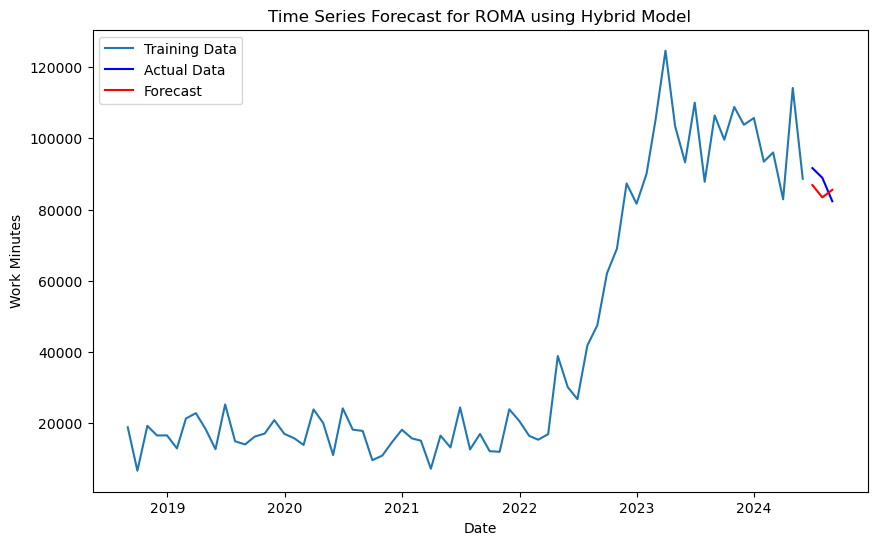

Location: ROMA - MAE: 4490.367933299145, RMSE: 4589.848799759555
Random Search Best Params for ROMA: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 1.5, 'colsample_bytree': 0.6, 'alpha': 1}
Grid Search Best Params for ROMA: {'alpha': 1, 'colsample_bytree': 0.6, 'lambda': 1.5, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 150, 'subsample': 0.8}
Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Fitting 2 folds for each of 9 candidates, totalling 18 fits


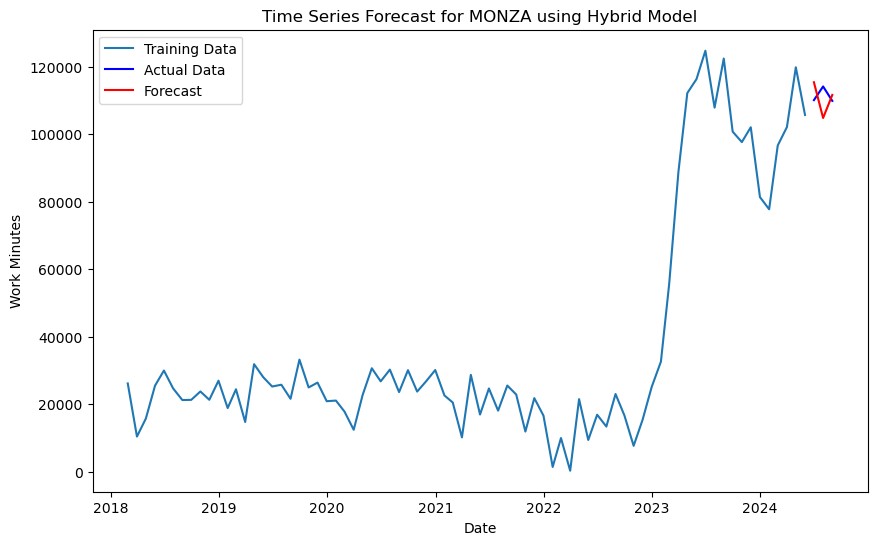

Location: MONZA - MAE: 5468.445394869486, RMSE: 6281.6553341273975
Random Search Best Params for MONZA: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'lambda': 1, 'colsample_bytree': 0.8, 'alpha': 1}
Grid Search Best Params for MONZA: {'alpha': 1, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Fitting 2 folds for each of 9 candidates, totalling 18 fits


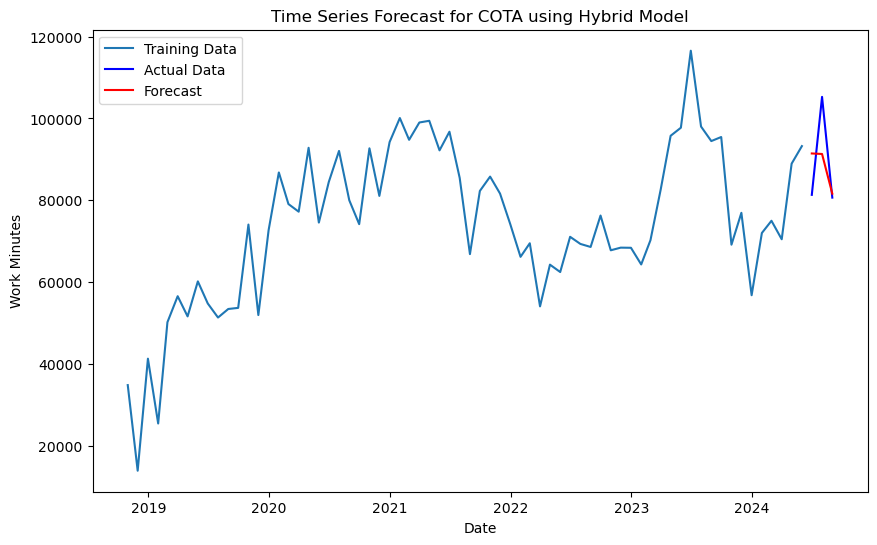

C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Location: COTA - MAE: 8340.477020180455, RMSE: 9959.991834233359
Random Search Best Params for COTA: {'subsample': 0.8, 'n_estimators': 150, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 2, 'colsample_bytree': 0.6, 'alpha': 0}
Grid Search Best Params for COTA: {'alpha': 0, 'colsample_bytree': 0.6, 'lambda': 2, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.8}
Fitting 2 folds for each of 20 candidates, totalling 40 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits


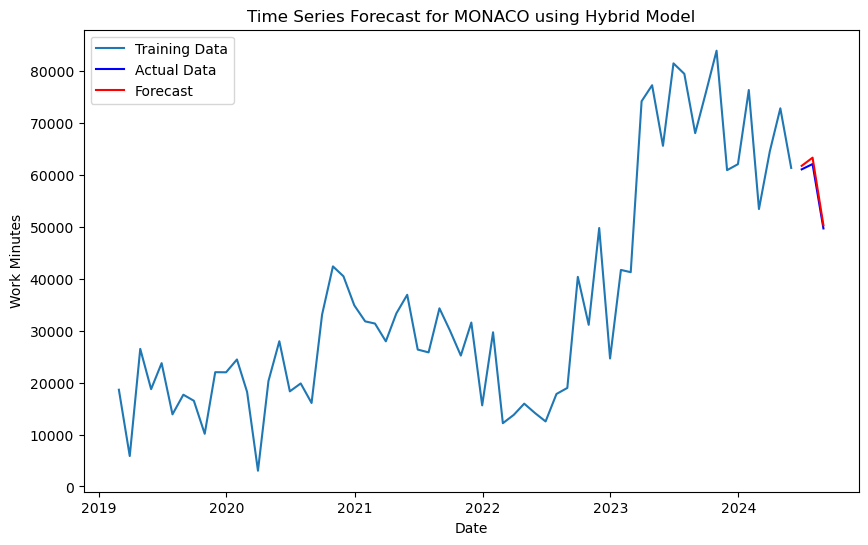

Location: MONACO - MAE: 839.6961896979943, RMSE: 884.2875835785538
Random Search Best Params for MONACO: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'lambda': 1, 'colsample_bytree': 0.6, 'alpha': 1}
Grid Search Best Params for MONACO: {'alpha': 1, 'colsample_bytree': 0.6, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Fitting 2 folds for each of 20 candidates, totalling 40 fits
Fitting 2 folds for each of 9 candidates, totalling 18 fits


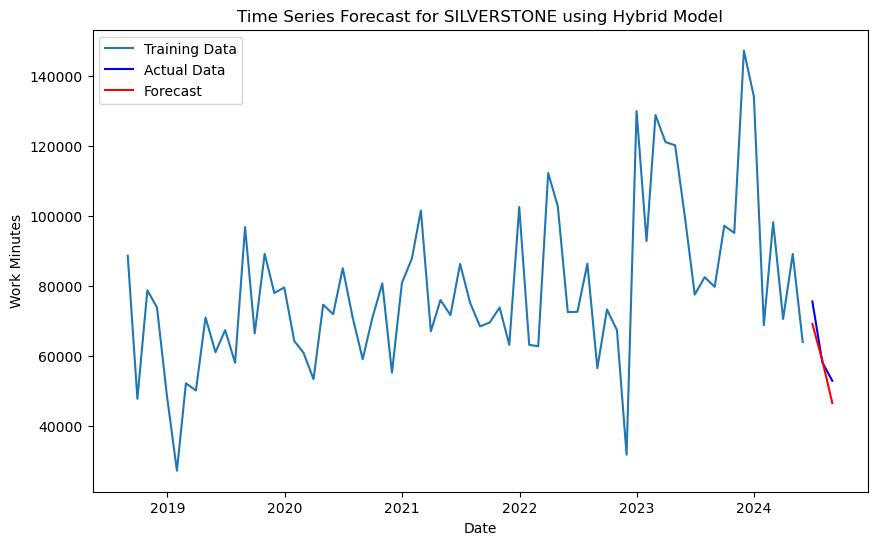

Location: SILVERSTONE - MAE: 4430.786485877713, RMSE: 5217.233672220655
Random Search Best Params for SILVERSTONE: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'lambda': 1, 'colsample_bytree': 0.8, 'alpha': 1}
Grid Search Best Params for SILVERSTONE: {'alpha': 1, 'colsample_bytree': 0.8, 'lambda': 1, 'learning_rate': 0.01, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\hp\AppData\Local\Temp\ipykernel_6360\496528077.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})


Fitting 2 folds for each of 9 candidates, totalling 18 fits


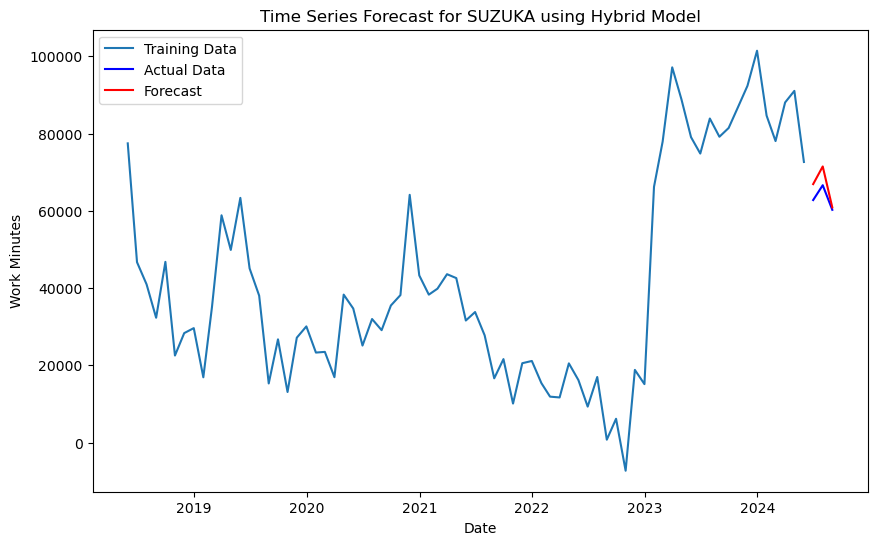

Location: SUZUKA - MAE: 3198.390260604215, RMSE: 3694.1222999336464
Random Search Best Params for SUZUKA: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 1, 'colsample_bytree': 1.0, 'alpha': 0.1}
Grid Search Best Params for SUZUKA: {'alpha': 0.1, 'colsample_bytree': 1.0, 'lambda': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


In [22]:

# Store results for each location
forecast_results = {}

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'alpha': [0, 0.1, 1],  # L1 regularization
    'lambda': [1, 1.5, 2]  # L2 regularization
}

# Function to prepare lagged features and other exogenous variables
def prepare_data(df, target_col, exog_cols, lags=12):
    """
    Prepares data for supervised learning by creating lagged target values
    and adding exogenous variables.
    """
    df = df.copy()

    # Create lagged features for the target variable
    for i in range(1, lags + 1):
        df[f"{target_col}_lag_{i}"] = df[target_col].shift(i)

    # Drop NaN values introduced by lagging
    df.dropna(inplace=True)

    # Select the target, lagged features, and exogenous variables
    feature_cols = [f"{target_col}_lag_{i}" for i in range(1, lags + 1)] + exog_cols
    X = df[feature_cols]
    y = df[target_col]

    return X, y

# Loop through each location in the data
for location in locations:
    data = location_data[location]
    data.set_index('EXECUTION_START_DATE', inplace=True)
    data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})

    # Monthly resampling and seasonal decomposition
    data_resampled = data.resample('M').agg({
        'ACTUAL_WORK_IN_MINUTES': 'sum',
        'TIME_TO_FIRST_USE': 'mean',
        'TOTAL_LIFESPAN': 'mean',
        'USABLE_DURATION': 'mean',
        'TIME_USED_TO_LIFESPAN_RATIO': 'mean',
        'MAINTENANCE_FREQUENCY': 'mean',
        'MAINTENANCE_DURATION_DEVIATION': 'mean',
        'FAILURE_RISK_SCORE': 'mean',
        'Risk_Level': 'max'
    }).dropna()

    # Seasonal decomposition of target variable
    stl = STL(data_resampled['ACTUAL_WORK_IN_MINUTES'], seasonal=13)
    result = stl.fit()

    # Extract seasonal, trend, and residual components
    data_resampled['trend'] = result.trend
    data_resampled['seasonal'] = result.seasonal
    data_resampled['residual'] = result.resid

    # Define target and features for residual modeling
    target_col = 'residual'
    exog_cols = [
        'TIME_TO_FIRST_USE', 'TOTAL_LIFESPAN', 'USABLE_DURATION',
        'TIME_USED_TO_LIFESPAN_RATIO', 'MAINTENANCE_FREQUENCY',
        'MAINTENANCE_DURATION_DEVIATION', 'FAILURE_RISK_SCORE', 'Risk_Level'
    ]

    # Prepare data with lagged features and additional trend/seasonal indicators
    X, y = prepare_data(data_resampled, target_col, exog_cols)
    X['trend'] = data_resampled['trend'].shift(1).fillna(method='bfill')
    X['seasonal'] = data_resampled['seasonal'].shift(1).fillna(method='bfill')

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3, shuffle=False)

    # Randomized search with regularization terms
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='neg_mean_squared_error',
        cv=2,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    random_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Use best params from RandomizedSearchCV in GridSearchCV for further tuning
    best_params_random = random_search.best_params_
    fine_param_grid = {
        'learning_rate': [best_params_random['learning_rate']],
        'n_estimators': [best_params_random['n_estimators'] - 50, best_params_random['n_estimators'], best_params_random['n_estimators'] + 50],
        'max_depth': [best_params_random['max_depth'] - 1, best_params_random['max_depth'], best_params_random['max_depth'] + 1],
        'min_child_weight': [best_params_random['min_child_weight']],
        'subsample': [best_params_random['subsample']],
        'colsample_bytree': [best_params_random['colsample_bytree']],
        'alpha': [best_params_random['alpha']],
        'lambda': [best_params_random['lambda']]
    }
    grid_search = GridSearchCV(
        estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
        param_grid=fine_param_grid,
        scoring='neg_mean_squared_error',
        cv=2,
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

    # Final model training
    best_params_grid = grid_search.best_params_
    final_model = XGBRegressor(objective='reg:squarederror', **best_params_grid)
    final_model.fit(X_train, y_train)

    # Make predictions on residuals and add back trend + seasonality
    residual_pred = final_model.predict(X_test)
    forecast = residual_pred + X_test['trend'].values + X_test['seasonal'].values

    # Evaluate forecast on original scale
    mae = mean_absolute_error(y_test + X_test['trend'] + X_test['seasonal'], forecast)
    rmse = np.sqrt(mean_squared_error(y_test + X_test['trend'] + X_test['seasonal'], forecast))

    forecast_results[location] = {
        'forecast': pd.Series(forecast, index=y_test.index),
        'actual': y_test + X_test['trend'] + X_test['seasonal'],
        'mae': mae,
        'rmse': rmse,
        'best_params_random': best_params_random,
        'best_params_grid': best_params_grid
    }

    # Plot forecast vs actual
    plt.figure(figsize=(10, 6))
    plt.plot(y_train.index, y_train + X_train['trend'] + X_train['seasonal'], label='Training Data')
    plt.plot(y_test.index, y_test + X_test['trend'] + X_test['seasonal'], label='Actual Data', color='blue')
    plt.plot(y_test.index, forecast, color='red', label='Forecast')
    plt.title(f'Time Series Forecast for {location} using Hybrid Model')
    plt.xlabel('Date')
    plt.ylabel('Work Minutes')
    plt.legend()
    plt.show()

    print(f'Location: {location} - MAE: {mae}, RMSE: {rmse}')
    print(f'Random Search Best Params for {location}: {best_params_random}')
    print(f'Grid Search Best Params for {location}: {best_params_grid}')



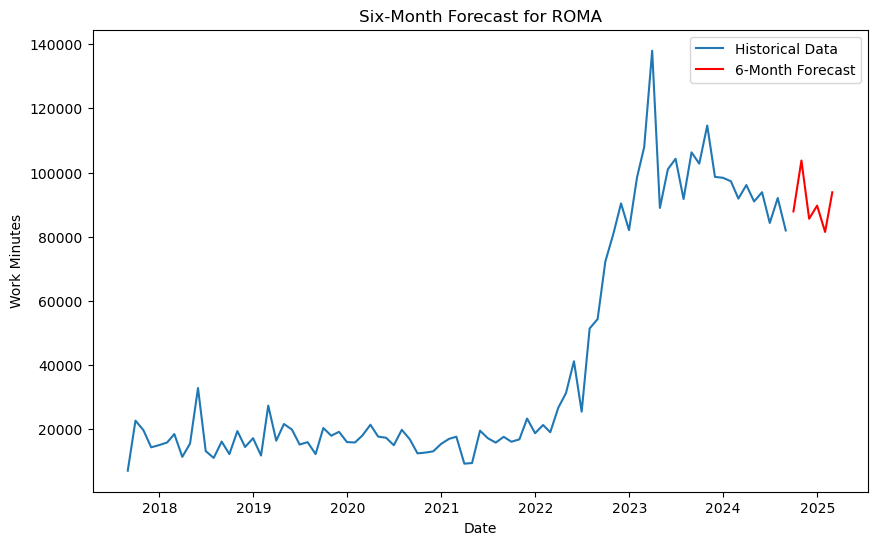

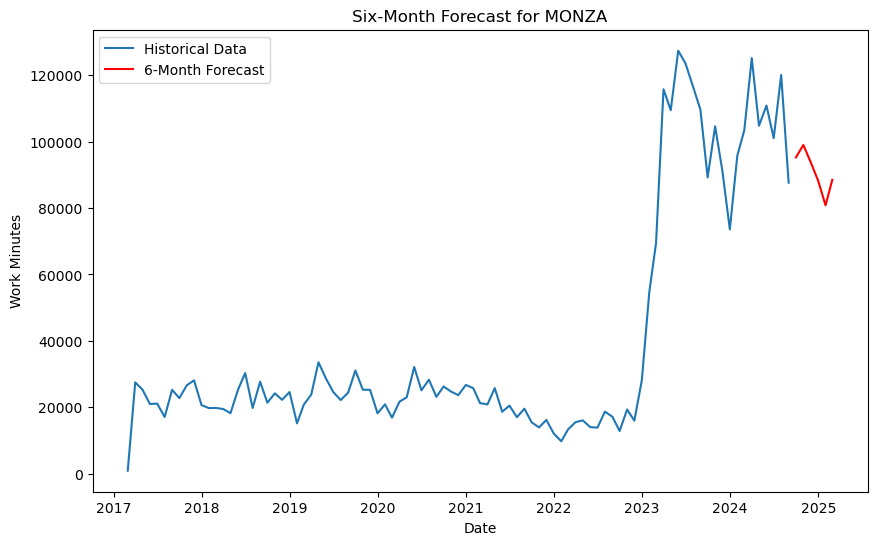

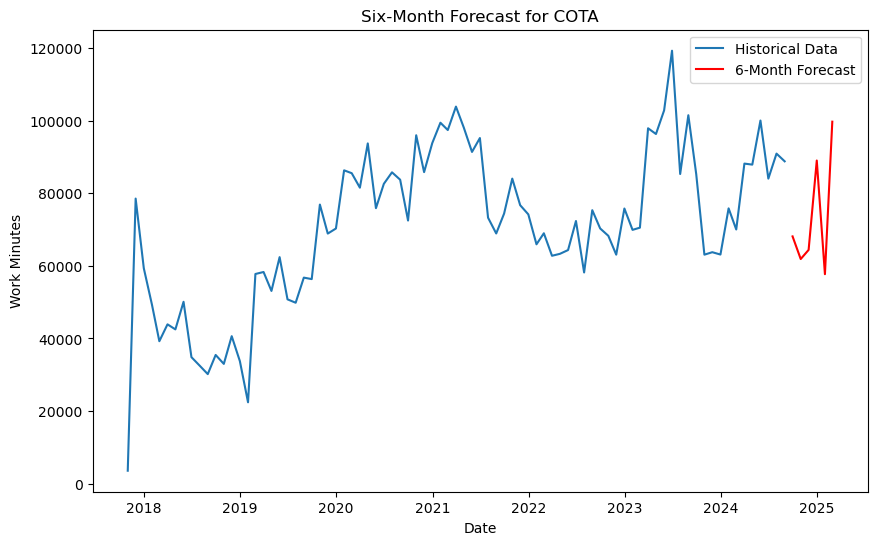

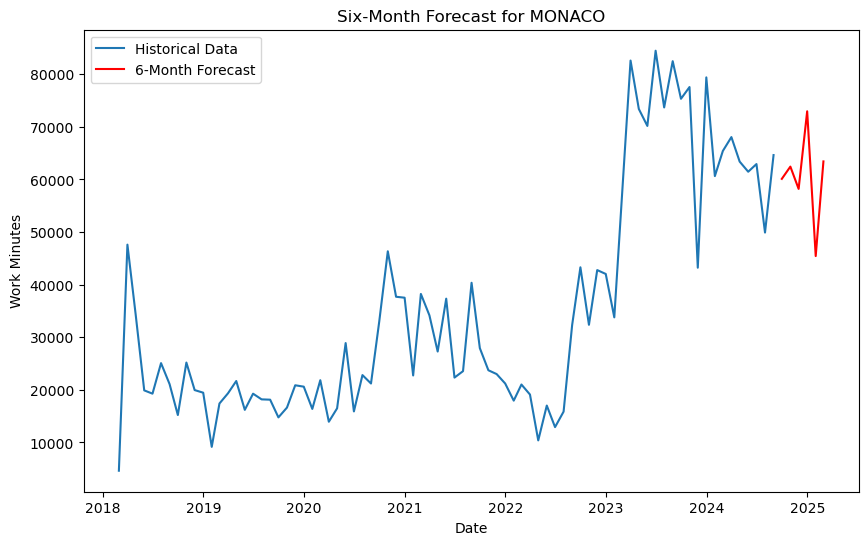

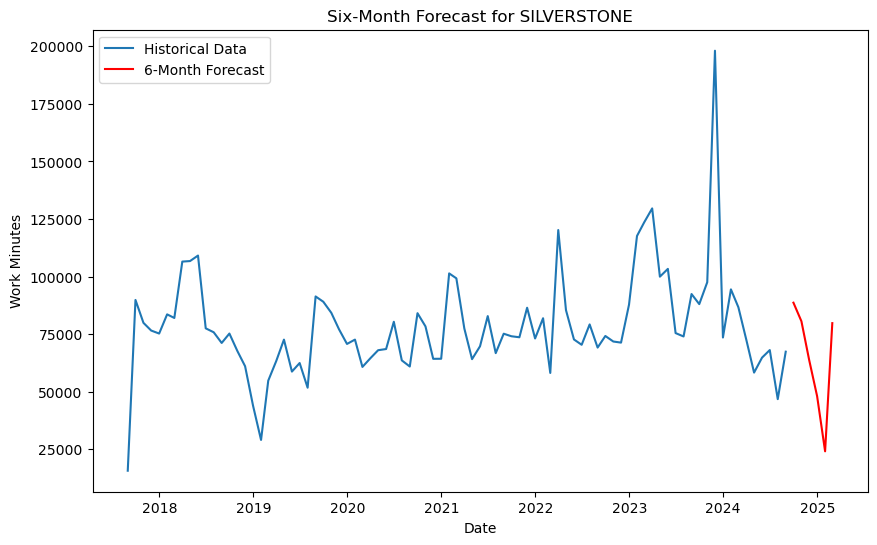

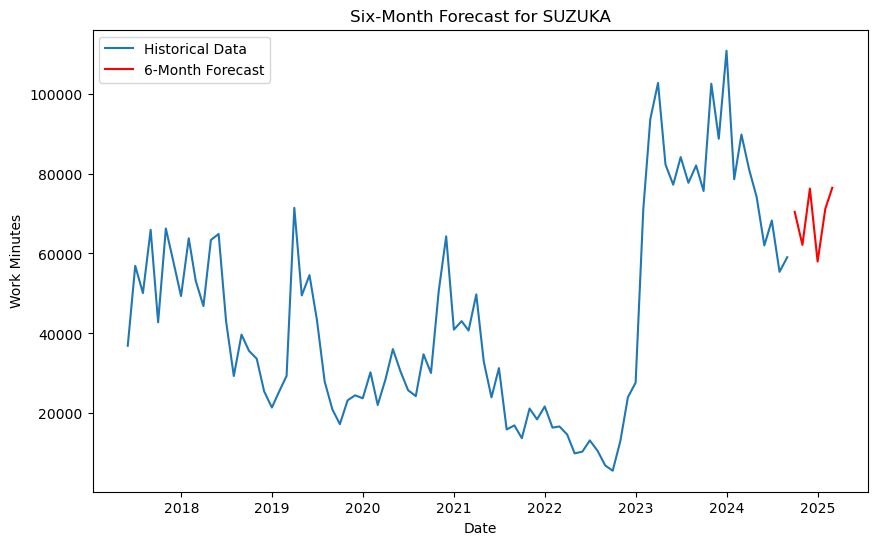

,Location,Date,Forecast
0,COTA,2024-09-30,68134.586797
1,COTA,2024-10-31,61896.837687
2,COTA,2024-11-30,64412.026677
3,COTA,2024-12-31,89048.980118
4,COTA,2025-01-31,57716.905289
5,COTA,2025-02-28,99757.658159
6,MONACO,2024-09-30,60105.082760
7,MONACO,2024-10-31,62433.868110
8,MONACO,2024-11-30,58196.948041
9,MONACO,2024-12-31,72947.716742


In [23]:

# Forecast results DataFrame to store month-wise predictions
forecast_df = pd.DataFrame(columns=['Location', 'Date', 'Forecast'])

# Loop to generate forecasts for each location
for location in locations:
    data = location_data[location]
    #data.set_index('EXECUTION_START_DATE', inplace=True)
    #data['Risk_Level'] = data['Risk_Level'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})

    # Monthly resampling and seasonal decomposition
    data_resampled = data.resample('M').agg({
        'ACTUAL_WORK_IN_MINUTES': 'sum',
        'TIME_TO_FIRST_USE': 'mean',
        'TOTAL_LIFESPAN': 'mean',
        'USABLE_DURATION': 'mean',
        'TIME_USED_TO_LIFESPAN_RATIO': 'mean',
        'MAINTENANCE_FREQUENCY': 'mean',
        'MAINTENANCE_DURATION_DEVIATION': 'mean',
        'FAILURE_RISK_SCORE': 'mean',
        'Risk_Level': 'max'
    }).dropna()

    # Seasonal decomposition
    stl = STL(data_resampled['ACTUAL_WORK_IN_MINUTES'], seasonal=13)
    result = stl.fit()
    data_resampled['trend'] = result.trend
    data_resampled['seasonal'] = result.seasonal
    data_resampled['residual'] = result.resid

    # Prepare data with lagged features and exogenous variables
    target_col = 'residual'
    exog_cols = [
        'TIME_TO_FIRST_USE', 'TOTAL_LIFESPAN', 'USABLE_DURATION',
        'TIME_USED_TO_LIFESPAN_RATIO', 'MAINTENANCE_FREQUENCY',
        'MAINTENANCE_DURATION_DEVIATION', 'FAILURE_RISK_SCORE', 'Risk_Level'
    ]
    X, y = prepare_data(data_resampled, target_col, exog_cols)
    X['trend'] = data_resampled['trend'].shift(1).fillna(method='bfill')
    X['seasonal'] = data_resampled['seasonal'].shift(1).fillna(method='bfill')

    # Train final model on complete data
    final_model = XGBRegressor(objective='reg:squarederror', **best_params_grid)
    final_model.fit(X, y)

    # Forecast for the next 6 months
    future_dates = pd.date_range(data_resampled.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
    future_X = X[-1:].copy()  # Use last row for generating future values

    forecast = []
    for date in future_dates:
        residual_pred = final_model.predict(future_X)
        trend_value = data_resampled['trend'].iloc[-1]  # Extend last known trend value
        seasonal_value = data_resampled['seasonal'].iloc[date.month % 12 - 1]  # Match month seasonality
        total_forecast = residual_pred[0] + trend_value + seasonal_value
        forecast.append(total_forecast)

        # Append forecast result to the DataFrame
        forecast_df = pd.concat([forecast_df, pd.DataFrame([{'Location': location, 'Date': date, 'Forecast': total_forecast}])], ignore_index=True)

        # Update lagged features in `future_X` for the next prediction step
        for lag in range(12, 1, -1):
            future_X[f'{target_col}_lag_{lag}'] = future_X[f'{target_col}_lag_{lag - 1}']
        future_X[f'{target_col}_lag_1'] = residual_pred[0]

    # Plot forecast results
    plt.figure(figsize=(10, 6))
    plt.plot(data_resampled.index, data_resampled['ACTUAL_WORK_IN_MINUTES'], label='Historical Data')
    plt.plot(future_dates, forecast, label='6-Month Forecast', color='red')
    plt.title(f'Six-Month Forecast for {location}')
    plt.xlabel('Date')
    plt.ylabel('Work Minutes')
    plt.legend()
    plt.show()

# Display forecasted values for each location
forecast_df['Date'] = pd.to_datetime(forecast_df['Date'])
forecast_df = forecast_df.sort_values(by=['Location', 'Date']).reset_index(drop=True)
forecast_df[['Location', 'Date', 'Forecast']]


The time series model (Auto ARIMA + SARIMAX) predicted ACTUAL_WORK_IN_MINUTES for six locations, with mixed performance across locations. MONACO achieved the best accuracy (MAE = 3,078, RMSE = 3,598), indicating the model effectively captured its patterns. In contrast, SILVERSTONE and COTA showed the largest errors (MAE and RMSE exceeding 16,000), suggesting difficulty in modeling their variability or outliers.

Locations like MONZA performed moderately well, with lower errors compared to high-error locations. Confidence intervals indicate higher uncertainty in forecasts for SILVERSTONE, while MONACO showed narrower intervals, reflecting higher confidence.

To improve, exogenous variables (e.g., FAILURE_RISK_SCORE, Risk_Level) should be evaluated for their relevance, especially for high-error locations. Additionally, refining SARIMAX parameters or exploring advanced models (e.g., Prophet, LSTM) could enhance performance. Segmenting locations by variability or patterns can also help in applying tailored modeling approaches for better accuracy.

### 4.ii Survival Analysis 

In [25]:
# Convert EQUIP_VALID_FROM and EXECUTION_START_DATE to datetime
data['EQUIP_VALID_FROM'] = pd.to_datetime(data['EQUIP_VALID_FROM'], format='%Y-%m-%d')
data['EXECUTION_START_DATE'] = pd.to_datetime(data['EXECUTION_START_DATE'], format='%Y-%m-%d')
data['EXECUTION_FINISH_DATE'] = pd.to_datetime(data['EXECUTION_FINISH_DATE'], format='%Y-%m-%d')
data['EQUIP_START_UP_DATE'] = pd.to_datetime(data['EQUIP_START_UP_DATE'], format='%Y-%m-%d')

data['EQUIP_VALID_FROM']


0        2020-02-10
1        2020-02-10
2        2020-02-10
3        2020-02-10
4        2023-12-11
            ...    
291790   2020-04-27
291791   2019-05-01
291792   2020-04-27
291793   2018-06-04
291794   2018-08-20
Name: EQUIP_VALID_FROM, Length: 291795, dtype: datetime64[ns]

In [31]:

# Step 2: Calculate time-to-event
data['time_to_event'] = (data['EXECUTION_START_DATE'] - data['EQUIP_START_UP_DATE']).dt.days

# Take the absolute value of the time_to_event column
data['time_to_event'] = data['time_to_event'].abs()

# Step 3: Define event indicator (1 if maintenance occurred, 0 otherwise)
# Assuming 'MAINTENANCE_ACTIVITY_TYPE' == 'Unplanned' indicates an event occurred
data['event'] = (data['MAINTENANCE_ACTIVITY_TYPE'] == 'Unplanned').astype(int)

# Step 4: Filter relevant columns for survival analysis
survival_data = data[['time_to_event', 'event', 'FAILURE_RISK_SCORE', "ACTUAL_WORK_IN_MINUTES", 'Risk_Level', 'EQUIPMENT_ID', 'MAINTENANCE_FREQUENCY']]
survival_data = survival_data.dropna()  # Drop rows with missing values


In [32]:
# Ensure all covariates are numeric
survival_data['Risk_Level'] = survival_data['Risk_Level'].map({'Low Risk': 1, 'Medium Risk': 2, 'High Risk': 3})

# Drop any unnecessary columns
survival_data = survival_data.drop(columns=['any_irrelevant_column'], errors='ignore')

# Remove missing values
survival_data = survival_data.dropna()

# Fit the Cox model
cph = CoxPHFitter()
cph.fit(survival_data, duration_col='time_to_event', event_col='event')

# Print summary and plot
cph.print_summary()


# Calculate the C-index
c_index = cph.concordance_index_
print(f"C-index: {c_index:.4f}")

C:\Users\hp\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


AttributeError: 'Index' object has no attribute '_format_flat'

<lifelines.CoxPHFitter: fitted with 291795 total observations, 150387 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 291795
number of events observed = 141408
   partial log-likelihood = -1665929.85
         time fit was run = 2024-12-08 23:40:22 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
FAILURE_RISK_SCORE     -43.50       0.00       2.87           -49.13           -37.87                 0.00                 0.00
ACTUAL_WORK_IN_MINUTES   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Risk_Level               0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
EQUIPMENT_ID            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
MAINTENANCE_FREQUENCY    0.00       1.00       0.00             0.00             0.01                 1.00                 1.01

                         cmp to      z      p   -log2(p)
covariate                                               
FAILURE_RISK_SCORE         0.00 -15.14 <0.005     169.55
ACTUAL_WORK_IN_MINUTES     0.00  17.13 <0.005     215.98
Risk_Level                 0.00   1.21   0.23       2.13
EQUIPMENT_ID               0.00  -0.53   0.60       0.75
MAINTENANCE_FREQUENCY      0.00  15.17 <0.005     170.18
---
Concordance = 0.68
Partial AIC = 3331869.71
log-likelihood ratio test = 4479.03 on 5 df
-log2(p) of ll-ratio test = inf

C-index: 0.6820


In [33]:
# Split the data
train_data, test_data = train_test_split(survival_data, test_size=0.3, random_state=42)

print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")


Training data size: (204256, 7)
Testing data size: (87539, 7)


In [34]:
# Fit the Cox model on training data
cph = CoxPHFitter()
cph.fit(train_data, duration_col='time_to_event', event_col='event')

# Print the summary
cph.print_summary()

# Calculate C-index on training and testing data
train_c_index = cph.score(train_data, scoring_method="concordance_index")
test_c_index = cph.score(test_data, scoring_method="concordance_index")

print(f"Training C-index: {train_c_index:.4f}")
print(f"Testing C-index: {test_c_index:.4f}")


C:\Users\hp\anaconda3\Lib\site-packages\lifelines\fitters\coxph_fitter.py:1614: ConvergenceWarning: Newton-Raphson failed to converge sufficiently. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-model
  warnings.warn(


AttributeError: 'Index' object has no attribute '_format_flat'

<lifelines.CoxPHFitter: fitted with 204256 total observations, 105200 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 204256
number of events observed = 99056
   partial log-likelihood = -1131685.95
         time fit was run = 2024-12-08 23:41:14 UTC

---
                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                      
FAILURE_RISK_SCORE     -42.37       0.00       3.23           -48.71           -36.03                 0.00                 0.00
ACTUAL_WORK_IN_MINUTES   0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Risk_Level               0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
EQUIPMENT_ID            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
MAINTENANCE_FREQUENCY    0.00       1.00       0.00             0.00             0.01                 1.00                 1.01

                         cmp to      z      p   -log2(p)
covariate                                               
FAILURE_RISK_SCORE         0.00 -13.10 <0.005     127.77
ACTUAL_WORK_IN_MINUTES     0.00  14.63 <0.005     158.52
Risk_Level                 0.00   1.06   0.29       1.78
EQUIPMENT_ID               0.00  -0.37   0.71       0.50
MAINTENANCE_FREQUENCY      0.00  13.12 <0.005     128.22
---
Concordance = 0.68
Partial AIC = 2263381.91
log-likelihood ratio test = 3079.63 on 5 df
-log2(p) of ll-ratio test = inf

Training C-index: 0.6809
Testing C-index: 0.6786


In [35]:

# Apply log transformation (adding a small constant to avoid log(0))
survival_data['LOG_MAINTENANCE_FREQUENCY'] = np.log1p(survival_data['MAINTENANCE_FREQUENCY'])
survival_data['LOG_FAILURE_RISK_SCORE'] = np.log1p(survival_data['FAILURE_RISK_SCORE'])


In [36]:

# Include the transformed variables in the model
survival_data_transformed = survival_data.copy()
survival_data_transformed = survival_data_transformed.drop(['MAINTENANCE_FREQUENCY', 'FAILURE_RISK_SCORE'], axis=1)


In [37]:
# Check for NaN values
print(survival_data_transformed.isnull().sum())

# Check for infinite values
print(np.isinf(survival_data_transformed).sum())


time_to_event                0
event                        0
ACTUAL_WORK_IN_MINUTES       0
Risk_Level                   0
EQUIPMENT_ID                 0
LOG_MAINTENANCE_FREQUENCY    0
LOG_FAILURE_RISK_SCORE       0
dtype: int64
time_to_event                0
event                        0
ACTUAL_WORK_IN_MINUTES       0
Risk_Level                   0
EQUIPMENT_ID                 0
LOG_MAINTENANCE_FREQUENCY    0
LOG_FAILURE_RISK_SCORE       0
dtype: int64


In [38]:
# Identify rows with non-positive durations
invalid_durations = survival_data_transformed[survival_data_transformed['time_to_event'] <= 0]
print(invalid_durations)


        time_to_event  event  ACTUAL_WORK_IN_MINUTES  Risk_Level  \
3927                0      1                   360.0           3   
6036                0      1                    45.0           1   
6038                0      1                   195.0           1   
6039                0      1                   120.0           1   
6040                0      0                    54.0           1   
...               ...    ...                     ...         ...   
291790              0      0                    15.0           2   
291791              0      0                    15.0           2   
291792              0      0                    18.0           2   
291793              0      1                   150.0           2   
291794              0      0                     9.0           2   

        EQUIPMENT_ID  LOG_MAINTENANCE_FREQUENCY  LOG_FAILURE_RISK_SCORE  
3927     300115000.0                   8.228444                0.362046  
6036     300019437.0               

In [39]:
# Add a small positive constant to non-positive durations
survival_data_transformed['time_to_event'] = survival_data_transformed['time_to_event'].apply(lambda x: 45 if x <= 0 else x)


In [40]:


aft = WeibullAFTFitter()

# Fit the Weibull AFT model
aft.fit(survival_data_transformed, duration_col='time_to_event', event_col='event')

# Print the summary
aft.print_summary()


AttributeError: 'Index' object has no attribute '_format_flat'

<lifelines.WeibullAFTFitter: fitted with 291795 total observations, 150387 right-censored observations>
             duration col = 'time_to_event'
                event col = 'event'
   number of observations = 291795
number of events observed = 141408
           log-likelihood = -1066827.85
         time fit was run = 2024-12-08 23:41:31 UTC

---
                                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                         
lambda_ ACTUAL_WORK_IN_MINUTES     -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        EQUIPMENT_ID                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        LOG_FAILURE_RISK_SCORE     -1.93       0.14       0.12            -2.16            -1.70                 0.12                 0.18
        LOG_MAINTENANCE_FREQUENCY   0.14       1.15       0.01             0.13             0.15                 1.14                 1.17
        Risk_Level                 -0.44       0.65       0.02            -0.47            -0.40                 0.63                 0.67
        Intercept                   6.93    1021.09       0.25             6.44             7.42               624.65              1669.13
rho_    Intercept                  -0.52       0.59       0.00            -0.53            -0.52                 0.59                 0.60

                                    cmp to       z      p   -log2(p)
param   covariate                                                   
lambda_ ACTUAL_WORK_IN_MINUTES        0.00  -23.55 <0.005     405.05
        EQUIPMENT_ID                  0.00    0.27   0.79       0.34
        LOG_FAILURE_RISK_SCORE        0.00  -16.57 <0.005     202.54
        LOG_MAINTENANCE_FREQUENCY     0.00   25.38 <0.005     469.56
        Risk_Level                    0.00  -26.12 <0.005     497.04
        Intercept                     0.00   27.63 <0.005     555.93
rho_    Intercept                     0.00 -262.15 <0.005        inf
---
Concordance = 0.54
AIC = 2133669.70
log-likelihood ratio test = 5610.54 on 5 df
-log2(p) of ll-ratio test = inf

In [41]:

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store C-index scores
c_index_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(survival_data_transformed):
    train_data = survival_data_transformed.iloc[train_index]
    test_data = survival_data_transformed.iloc[test_index]
    
    # Fit the Weibull AFT model on the training data
    aft = WeibullAFTFitter()
    aft.fit(train_data, duration_col='time_to_event', event_col='event')
    
    # Evaluate on the test data
    c_index = aft.score(test_data, scoring_method="concordance_index")
    c_index_scores.append(c_index)

# Calculate mean and standard deviation of C-index
mean_c_index = np.mean(c_index_scores)
std_c_index = np.std(c_index_scores)

print(f"Cross-Validation Results:\nMean C-index: {mean_c_index:.4f}\nStandard Deviation: {std_c_index:.4f}")



Cross-Validation Results:
Mean C-index: 0.5495
Standard Deviation: 0.0130


In [45]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 3 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 3: {median_survival_time} days")


Median Survival Time for Risk Level 3: 235.0 days


In [ ]:


# Initialize Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Plot Kaplan-Meier survival curves for each Risk_Level
plt.figure(figsize=(10, 6))
for level in sorted(survival_data_transformed['Risk_Level'].unique()):
    # Subset data for the specific risk level
    subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == level]
    
    # Fit the Kaplan-Meier model
    kmf.fit(subset['time_to_event'], event_observed=subset['event'], label=f"Risk Level {level}")
    
    # Plot the survival function
    kmf.plot_survival_function()

# Customize the plot
plt.title("Kaplan-Meier Survival Curves by Risk Level")
plt.xlabel("Time to Event")
plt.ylabel("Survival Probability")
plt.grid()

plt.legend()
plt.show()


In [46]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 2 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 2: {median_survival_time} days")


Median Survival Time for Risk Level 2: 484.0 days


In [47]:
### from lifelines import KaplanMeierFitter

# Filter for Risk Level 3
subset = survival_data_transformed[survival_data_transformed['Risk_Level'] == 1 ]

# Use the capped or transformed time_to_event
kmf = KaplanMeierFitter()
kmf.fit(durations=subset['time_to_event'], event_observed=subset['event'])

# Print median survival time
median_survival_time = kmf.median_survival_time_
print(f"Median Survival Time for Risk Level 1: {median_survival_time} days")


Median Survival Time for Risk Level 1: 953.0 days


In [48]:
# Count the number of observations for each Risk Level
print(survival_data_transformed['Risk_Level'].value_counts())


1    145898
2    116721
3     29176
Name: Risk_Level, dtype: int64


In [49]:
# Use the Weibull AFT model to predict median survival time for individual equipment
expected_breakdown_time = aft.predict_median(survival_data_transformed)
print(expected_breakdown_time.head())

# Attach the predicted breakdown time to the original dataset
survival_data_transformed['expected_breakdown_time'] = expected_breakdown_time


0    448.973746
1    448.017946
2    460.610863
3    459.629180
4    443.407878
dtype: float64


In [50]:
# Sort by expected breakdown time and risk level
prioritized_maintenance_schedule = survival_data_transformed.sort_values(by=['Risk_Level', 'expected_breakdown_time'])

# View top priority items
print(prioritized_maintenance_schedule.head())


        time_to_event  event  ACTUAL_WORK_IN_MINUTES  Risk_Level  \
155732             45      1                  5430.0           1   
82267              45      1                  2940.0           1   
85055             468      1                  2490.0           1   
287345             45      1                  5220.0           1   
136445            302      1                  4200.0           1   

        EQUIPMENT_ID  LOG_MAINTENANCE_FREQUENCY  LOG_FAILURE_RISK_SCORE  \
155732   300045213.0                   1.386294                0.062750   
82267    300044579.0                   0.693147                0.028103   
85055    300249209.0                   0.693147                0.035575   
287345   300045067.0                   2.302585                0.072538   
136445   300230438.0                   1.791759                0.055026   

        expected_breakdown_time  
155732               314.826413  
82267                346.043656  
85055                348.787946  
2873

In [51]:
# Sort equipment by predicted breakdown time and risk level
prioritized_equipment = survival_data_transformed.sort_values(by=['Risk_Level', 'expected_breakdown_time'])
print(prioritized_equipment[['Risk_Level', 'expected_breakdown_time']].head())


        Risk_Level  expected_breakdown_time
155732           1               314.826413
82267            1               346.043656
85055            1               348.787946
287345           1               355.435129
136445           1               360.121494


In [52]:
# Group equipment by maintenance interval (e.g., 30-day intervals)
survival_data_transformed['maintenance_interval'] = pd.cut(
    survival_data_transformed['expected_breakdown_time'],
    bins=[0, 30, 60, 90, 180, 365],
    labels=['0-30 days', '31-60 days', '61-90 days', '91-180 days', '180+ days']
)
print(survival_data_transformed.groupby('maintenance_interval').size())


maintenance_interval
0-30 days          1
31-60 days         0
61-90 days         1
91-180 days        6
180+ days      29224
dtype: int64


In [ ]:
# Fit Kaplan-Meier for all equipment
kmf = KaplanMeierFitter()
kmf.fit(durations=survival_data_transformed['time_to_event'], event_observed=survival_data_transformed['event'])

# Plot the survival curve
kmf.plot_survival_function()
plt.title("Survival Curve for Equipment")
plt.xlabel("Time to Event (days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.show()



### 5.Conclusion

This project provides a comprehensive framework for predictive maintenance, combining robust modeling techniques with actionable insights tailored to Swire Coca-Cola’s unique operational challenges. By adopting these strategies, the company can transition from reactive to proactive maintenance, ensuring reliability, optimizing production, and unlocking significant financial savings. This approach not only addresses current inefficiencies but also lays the foundation for scalable and data-driven operational excellence.

### 6.Team Contribution

Sanket Janolkar:
    Worked on data cleaning and feature engineering.
    Developed and tuned the time series model.

Gautam Nair:
    Worked on data cleaning and feature engineering, including the calculation of risk frequency scores and machine age to determine breakdown frequency.
    Performed hyperparameter tuning for all models.

Sarvesh Keluskar:
    Focused on NLP and the LDA model to analyze downtime and identify the majority of breakdown parts and their counts.
    Contributed to survival analysis for further insights.

Nishigandha Tayade:
    Worked on survival analysis and decision tree models, including their evaluation to derive conclusions.
    Compiled the final notebook.